In [15]:
import os
import time 
import numpy as np
import argparse
from glob import iglob
from collections import defaultdict
import scipy.ndimage
import scipy.io as sio
import sys
import csv
from scipy.ndimage.interpolation import shift
import matplotlib.pyplot as plt
import pytomography
from pytomography.io.SPECT import simind
import matplotlib.pyplot as plt
import torch
import pydicom as dicom

def my_read_bin(cur_inp_file, data_type, input_shape):
  A = np.fromfile(cur_inp_file, dtype = data_type)
  A[np.isnan(A)] = 0
  A = np.reshape(A, input_shape)
 
  return A

def my_write_bin(cur_out_file, data_type, data):
  
  data.astype(data_type).tofile(cur_out_file)
  return

/tmp/ipykernel_2323589/3712044842.py:11: DeprecationWarning: Please import `shift` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.interpolation import shift


In [85]:
import pydicom as dicom
import matplotlib.pylab as plt
import numpy as np
import os
from tempfile import TemporaryFile
import pandas as pd
import shutil 

def my_read_bin(cur_inp_file, data_type, input_shape):
  A = np.fromfile(cur_inp_file, dtype = data_type)
  A[np.isnan(A)] = 0
  A = np.reshape(A, input_shape)
  #A = np.transpose(A, [2, 1, 0])
  return A

def my_write_bin(cur_out_file, data_type, data):
  #data = np.transpose(data, [2, 1, 0])
  data.astype(data_type).tofile(cur_out_file)
  return

# Get the list of patient data and directories
real_patient_data_path = "/data01/user-storage/y.zezhang/data_from_zitong_real_patient_project/real_disease_data2_total/real_disease_data_original"
patient_list = os.listdir(real_patient_data_path)

# select useful_data
useful_patient_list=[]
for count, ele in enumerate(patient_list):
    if 'PriPrj' in ele:
        useful_patient_list.append(ele)
    
# need upscale file's path 
need_upscale_file_path = "/data01/user-storage/y.zezhang/image_trial_project/phantom"
need_upscale_list = os.listdir(need_upscale_file_path)

# simind collimator cases
simind_collimator=['ge670','siemens_symbia','philips_precedence','ge_hawkeye']

                            
save_folder="/data01/user-storage/y.zezhang/image_trial_project/phantom_upscale"
                            

filename_base = "feas_param"

# image dimension
#patient
real_patient_x=64
real_patient_y=64
real_patient_z=30
patient_image_dimension=real_patient_x*real_patient_y*real_patient_z

#upscale image
upscale_image_x=64
upscale_image_y=64
upscale_image_z=30
upscale_image_dimension=upscale_image_x*upscale_image_y*upscale_image_z

real_patient_pixel_average_list=[]
for index, useful_patient in enumerate(useful_patient_list):

    useful_patient_path=os.path.join(real_patient_data_path, useful_patient)
    patient_file_list = os.listdir(useful_patient_path)
    patient_file_list.remove('metacache.mim')
    patient_file=os.path.join(useful_patient_path, patient_file_list[0])  
    ds = dicom.dcmread(patient_file)
    
    
    Real_World_Value_Intercept=ds[0x00409096][0][0x00409224].value
    Real_World_Value_Slope=ds[0x00409096][0][0x00409225].value
    
    
    real_patient_image=ds.pixel_array*Real_World_Value_Slope+Real_World_Value_Intercept
    
    patient_pixel_average=np.sum(real_patient_image)/patient_image_dimension
    
    real_patient_pixel_average_list.append(patient_pixel_average)
    

object_pixel_average_list=[]   
num_hl=48
mode_index=0    
gender=['male','female']
for simind_collimator_index in simind_collimator:
    for gender_index in gender:
        for hl_index in range(num_hl):
            
            filename=f'{filename_base}_md{mode_index}_{gender_index}_nr{hl_index}'

            phantom_folder=need_upscale_file_path+"/"+filename
            
            phantom_file_pri= phantom_folder+"/"+simind_collimator_index+"_tot_w1.a00"
            pri_win=my_read_bin(phantom_file_pri, np.float32, [upscale_image_z,upscale_image_y,upscale_image_x])
            phamton_pixel_average=np.sum(pri_win)/upscale_image_dimension
            
            object_pixel_average_list.append(phamton_pixel_average)


real_patient_pixel_average=np.sum(real_patient_pixel_average_list)/len(real_patient_pixel_average_list)          
object_pixel_average=np.sum(object_pixel_average_list)/len(object_pixel_average_list)         
    



In [1]:
file = open("upscale_ratio.txt", "r")
activity_scale = file.read()
file.close()

In [3]:
import os
import numpy as np
from glob import iglob
from collections import defaultdict
import matplotlib.pyplot as plt
from pytomography.io.SPECT import simind
import matplotlib.pyplot as plt


def my_read_bin(cur_inp_file, data_type, input_shape):
  A = np.fromfile(cur_inp_file, dtype = data_type)
  A[np.isnan(A)] = 0
  A = np.reshape(A, input_shape)
  #A = np.transpose(A, [2, 1, 0])
  return A

In [10]:
pri_win=my_read_bin('ge_hawkeye.ict', np.float32, [64,64,64])

In [11]:
pri_win= np.transpose(pri_win, [0, 2, 1])

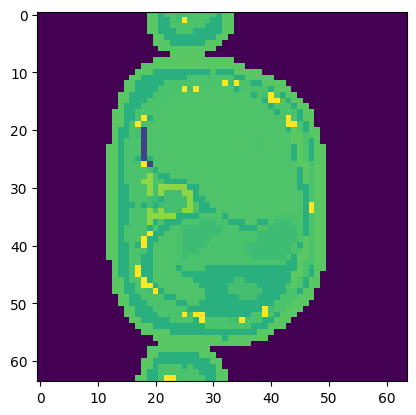

In [12]:
plt.imshow(pri_win[32,:,:])